# Import data

In [1]:
%matplotlib widget
import pandas as pd
import warnings
from matplotlib import pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')
from datetime import timedelta
import seaborn as sns

In [2]:
import os
import sys
sys.path.append("../helpers")
import flow_loop_preprocess_XW as process
import lablog_parser as lablog

read the original csv file

In [3]:
data = pd.read_csv(r'C:\Users\Wang\OneDrive\Data science\S2DS\Data\flow_loop\Flow_Loop_Data_071522.csv', header=None)

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,NaN,Start time,7/15/22 8am,Stop time,7/15/22 8pm,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Variable path,NaN,\\RWH-201\Test_FlowLoop_Network:RSLinx Enterpr...,NaN,\\RWH-201\Test_FlowLoop_Network:RSLinx Enterpr...,NaN,\\RWH-201\Test_FlowLoop_Network:RSLinx Enterpr...,NaN,\\RWH-201\Test_FlowLoop_Network:RSLinx Enterpr...,NaN,...,\\RWH-201\Test_FlowLoop_Network:RSLinx Enterpr...,NaN,\\RWH-201\Test_FlowLoop_Network:RSLinx Enterpr...,NaN,\\RWH-201\Test_FlowLoop_Network:RSLinx Enterpr...,NaN,\\RWH-201\Test_FlowLoop_Network:RSLinx Enterpr...,NaN,\\RWH-201\Test_FlowLoop_Network:RSLinx Enterpr...,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Name,NaN,FIT102,NaN,FIT102_Raw_Signal,NaN,FIT202,NaN,FIT202_Raw_Signal,NaN,...,PIT202_Raw_Signal,NaN,SI102,NaN,SI102_Raw_Signal,NaN,SI202,NaN,SI202_Raw_Signal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Processing

## formatting 
change the talbe to nicer format

In [5]:
data = process.table_formatting(data)
data.head()

,time_FIT102,FIT102,time_FIT102_Raw_Signal,FIT102_Raw_Signal,time_FIT202,FIT202,time_FIT202_Raw_Signal,FIT202_Raw_Signal,time_LIT101,LIT101,...,time_PIT202_Raw_Signal,PIT202_Raw_Signal,time_SI102,SI102,time_SI102_Raw_Signal,SI102_Raw_Signal,time_SI202,SI202,time_SI202_Raw_Signal,SI202_Raw_Signal
0,2022-07-15 08:16:28,-0.028125,2022-07-15 08:00:00,3996.0,2022-07-15 08:16:41,-0.007500,2022-07-15 08:00:01,3970.0,2022-07-15 08:16:50,50.740753,...,2022-07-15 08:00:07,4232.0,2022-07-15 08:16:29,0.307500,2022-07-15 08:00:02,3998.0,2022-07-15 08:16:38,-0.007500,2022-07-15 08:00:01,3997.0
1,2022-07-15 08:16:33,4.237500,2022-07-15 08:00:01,3992.0,2022-07-15 08:16:42,4.042500,2022-07-15 08:00:02,3971.0,2022-07-15 08:30:01,50.613255,...,2022-07-15 08:00:08,4231.0,2022-07-15 08:16:33,24.588751,2022-07-15 08:00:02,4000.0,2022-07-15 08:16:39,0.491250,2022-07-15 08:00:01,3998.0
2,2022-07-15 08:16:35,9.000000,2022-07-15 08:00:01,3997.0,2022-07-15 08:16:44,11.536251,2022-07-15 08:00:07,3970.0,2022-07-15 10:40:31,50.158504,...,2022-07-15 08:00:08,4232.0,2022-07-15 08:16:35,25.488750,2022-07-15 08:00:21,4001.0,2022-07-15 08:16:44,30.885002,2022-07-15 08:00:04,3999.0
3,2022-07-15 08:16:37,12.056251,2022-07-15 08:00:13,3999.0,2022-07-15 08:16:45,13.866251,2022-07-15 08:00:08,3971.0,2022-07-15 10:45:41,50.464504,...,2022-07-15 08:00:09,4231.0,2022-07-15 08:16:44,25.023750,2022-07-15 08:00:22,4000.0,2022-07-15 08:16:45,32.962502,2022-07-15 08:00:05,3998.0
4,2022-07-15 08:16:39,13.068750,2022-07-15 08:00:14,3997.0,2022-07-15 08:16:47,12.141251,2022-07-15 08:00:09,3970.0,2022-07-15 10:55:46,50.434753,...,2022-07-15 08:00:13,4232.0,2022-07-15 08:22:06,25.623751,2022-07-15 08:00:25,4001.0,2022-07-15 08:16:46,26.838751,2022-07-15 08:00:11,3999.0


## resample 

modify the time interval to 1 second, merge all time stamps for each feature into one uniform timestamp

In [6]:
df = process.resample('1S', data)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43201 entries, 2022-07-15 08:00:00 to 2022-07-15 20:00:00
Freq: S
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FIT102_Raw_Signal  43201 non-null  float64
 1   FIT202_Raw_Signal  43194 non-null  float64
 2   LIT101_Raw_Signal  43201 non-null  float64
 3   LIT201_Raw_Signal  43188 non-null  float64
 4   PIT101_Raw_Signal  43184 non-null  float64
 5   PIT102_Raw_Signal  43196 non-null  float64
 6   PIT201_Raw_Signal  43201 non-null  float64
 7   PIT202_Raw_Signal  43194 non-null  float64
 8   SI102_Raw_Signal   43199 non-null  float64
 9   SI202_Raw_Signal   43199 non-null  float64
dtypes: float64(10)
memory usage: 3.6 MB


In [8]:
df

,FIT102_Raw_Signal,FIT202_Raw_Signal,LIT101_Raw_Signal,LIT201_Raw_Signal,PIT101_Raw_Signal,PIT102_Raw_Signal,PIT201_Raw_Signal,PIT202_Raw_Signal,SI102_Raw_Signal,SI202_Raw_Signal
2022-07-15 08:00:00,3996.0,NaN,15991.0,NaN,NaN,5188.0,4541.0,NaN,NaN,NaN
2022-07-15 08:00:01,3994.5,3970.0,16015.0,NaN,NaN,5190.0,4540.0,NaN,NaN,3997.5
2022-07-15 08:00:02,3999.0,3971.0,16014.0,NaN,4589.0,5190.0,4540.5,NaN,3999.0,3999.0
2022-07-15 08:00:03,3999.0,3970.0,16012.0,18246.0,4588.0,5190.0,4540.5,NaN,4001.0,3999.0
2022-07-15 08:00:04,3999.0,3970.0,15998.5,18247.0,4588.5,5188.5,4540.5,NaN,4001.0,3999.0
...,...,...,...,...,...,...,...,...,...,...
2022-07-15 19:59:56,3990.0,NaN,12491.5,NaN,NaN,NaN,4424.5,4162.0,3999.0,4000.0
2022-07-15 19:59:57,3990.0,NaN,12507.0,NaN,NaN,NaN,4425.0,4161.5,3999.0,4000.0
2022-07-15 19:59:58,3990.0,NaN,12506.0,NaN,NaN,NaN,4424.0,4161.0,3999.0,3997.0
2022-07-15 19:59:59,3990.0,NaN,12487.0,NaN,NaN,NaN,4425.0,4161.5,3999.0,3998.0


## labeling

label the previous per second df with either normal, restoring or specific event

In [9]:
df = process.labeling('2022-07-15', df)
df.head()

,FIT102_Raw_Signal,FIT202_Raw_Signal,LIT101_Raw_Signal,LIT201_Raw_Signal,PIT101_Raw_Signal,PIT102_Raw_Signal,PIT201_Raw_Signal,PIT202_Raw_Signal,SI102_Raw_Signal,SI202_Raw_Signal,event
index,,,,,,,,,,,
2022-07-15 08:26:00,5466.0,16004.0,15909.0,18468.5,4583.0,5769.5,4205.0,4933.5,10802.0,13073.5,normal
2022-07-15 08:26:01,5471.0,15992.0,15920.0,18468.5,4582.0,5769.5,4206.0,4935.0,10794.0,13063.5,normal
2022-07-15 08:26:02,5466.0,16010.0,15917.5,18468.5,4583.0,5768.0,4203.0,4939.0,10802.5,13077.5,normal
2022-07-15 08:26:03,5456.0,15973.5,15881.0,18469.0,4582.0,5767.0,4205.0,4935.5,10802.5,13062.0,normal
2022-07-15 08:26:04,5447.0,16016.0,15912.0,18470.0,4583.0,5769.0,4202.5,4942.0,10802.5,13036.0,normal


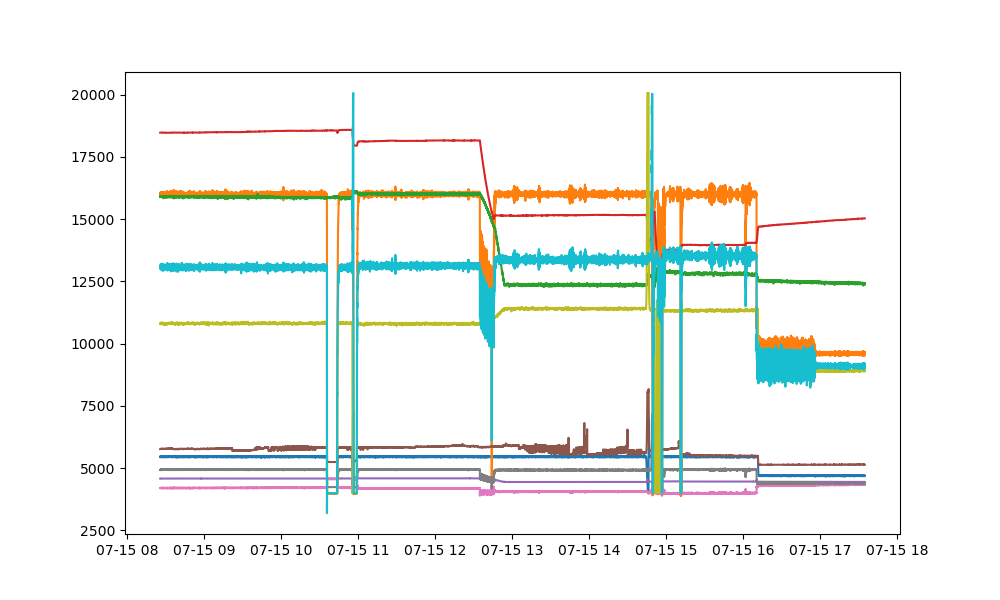

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df.drop(columns=['event']))
plt.show()

only plot the anomalies

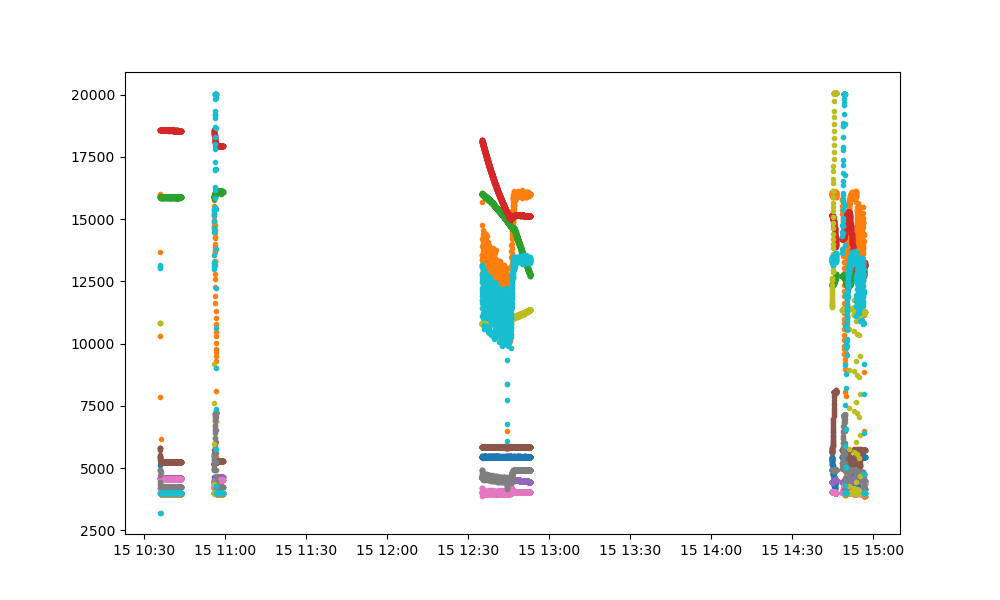

In [11]:
df_new = df[(df['event'] != 'normal') & (df['event'] != 'restoring')]
plt.figure(figsize=(10, 6))
plt.plot(df_new.drop(columns=['event']), '.')
plt.show()

In [12]:
df['event'].value_counts()

normal                    29262
restoring                  1329
HV_201                      650
power                       461
HV_101                      431
overall_instrument_air      196
SV_101                      180
SV_201                      121
SV_101_half                 120
LCV_203                     111
LCV_103                      80
Name: event, dtype: int64

## Aggregattion

In [63]:
df = pd.read_csv(r'C:\Users\Wang\OneDrive\Data science\S2DS\Data\flow_loop\cleaned\Flow_Loop_Data_071522.csv', index_col='index')

In [65]:
df['event'].value_counts()

normal                    29262
restoring                  1329
HV_201                      650
power                       461
HV_101                      431
overall_instrument_air      196
SV_101                      180
SV_201                      121
SV_101_half                 120
LCV_203                     111
LCV_103                      80
Name: event, dtype: int64

In [24]:
import feature_eng_XW as feature

In [33]:
get_window(df, 100)[0]

,FIT102_Raw_Signal,FIT202_Raw_Signal,LIT101_Raw_Signal,LIT201_Raw_Signal,PIT101_Raw_Signal,PIT102_Raw_Signal,PIT201_Raw_Signal,PIT202_Raw_Signal,SI102_Raw_Signal,SI202_Raw_Signal,event
index,,,,,,,,,,,
2022-07-15 08:26:40,5449.5,16019.5,15888.0,18469.0,4582.5,5776.5,4205.0,4937.5,10833.0,13052.5,normal
2022-07-15 08:26:41,5454.0,15979.5,15920.0,18469.0,4583.0,5773.5,4205.0,4932.5,10833.0,13081.0,normal
2022-07-15 08:26:42,5457.5,16041.0,15920.0,18470.0,4583.0,5772.0,4209.0,4939.5,10828.5,13022.0,normal
2022-07-15 08:26:43,5460.0,15995.5,15917.0,18472.0,4582.5,5773.0,4202.5,4934.5,10827.5,13107.5,normal
2022-07-15 08:26:44,5456.0,15990.5,15911.0,18472.0,4582.5,5773.0,4206.0,4933.0,10822.0,13038.0,normal
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15 08:28:05,5465.0,16060.0,15917.5,18472.0,4582.0,5770.0,4199.5,4944.5,10782.5,13023.5,normal
2022-07-15 08:28:06,5465.0,16013.0,15909.5,18473.0,4582.5,5768.0,4202.0,4933.0,10780.5,13085.0,normal
2022-07-15 08:28:07,5453.0,15954.0,15914.5,18473.0,4582.0,5770.0,4204.0,4930.5,10789.0,13086.0,normal


In [74]:
import glob
raw_dic = {}  
file_paths = glob.glob("../../Data/flow_loop/cleaned/*.csv") 
for path in file_paths:
    df = pd.read_csv(path, index_col='index')
    print(path)
    print(df['event'].value_counts())
    print()

../../Data/flow_loop/cleaned\Flow_Loop_Data_071322.csv
normal    27541
Name: event, dtype: int64

../../Data/flow_loop/cleaned\Flow_Loop_Data_071422.csv
normal    25921
Name: event, dtype: int64

../../Data/flow_loop/cleaned\Flow_Loop_Data_071522.csv
normal                    29262
restoring                  1329
HV_201                      650
power                       461
HV_101                      431
overall_instrument_air      196
SV_101                      180
SV_201                      121
SV_101_half                 120
LCV_203                     111
LCV_103                      80
Name: event, dtype: int64

../../Data/flow_loop/cleaned\Flow_Loop_Data_071722.csv
normal    7381
Name: event, dtype: int64

../../Data/flow_loop/cleaned\Flow_Loop_Data_071822.csv
normal                    27173
restoring                  2400
HV_101                     2221
LCV_203                     602
overall_instrument_air      272
SV_201                      211
power                     

In [76]:
path=os.path.join("..","data","raw","Lablog_processed.xlsx")
anomalies=lablog.read_anomalies(path,['2022-07-21'])

In [77]:
anomalies

[['period ',
  datetime.datetime(2022, 7, 21, 9, 16),
  datetime.datetime(2022, 7, 21, 17, 2)],
 ['overall_instrument_air',
  datetime.datetime(2022, 7, 21, 9, 39, 30),
  datetime.datetime(2022, 7, 21, 9, 50)],
 ['LCV_203',
  datetime.datetime(2022, 7, 21, 9, 58, 20),
  datetime.datetime(2022, 7, 21, 10, 1)],
 ['LCV_103',
  datetime.datetime(2022, 7, 21, 10, 22),
  datetime.datetime(2022, 7, 21, 10, 36)],
 ['SV_201',
  datetime.datetime(2022, 7, 21, 10, 51),
  datetime.datetime(2022, 7, 21, 11, 27)],
 ['SV_101',
  datetime.datetime(2022, 7, 21, 12, 17, 30),
  datetime.datetime(2022, 7, 21, 12, 19, 50)],
 ['LCV_103',
  datetime.datetime(2022, 7, 21, 12, 33, 30),
  datetime.datetime(2022, 7, 21, 12, 35, 20)],
 ['LCV_202',
  datetime.datetime(2022, 7, 21, 13, 23, 40),
  datetime.datetime(2022, 7, 21, 13, 25)],
 ['HV_101',
  datetime.datetime(2022, 7, 21, 14, 40, 30),
  datetime.datetime(2022, 7, 21, 14, 46)]]

In [53]:
%%time
feature_dic = {}
i = 0
while i+29 <= (df.shape[0]):
    print(i, i+29)
    # 29 + 1 = 30 ==> window size
    # slice the df to chunks with window size
    sub_df = df.iloc[i:i+29, :]
    events = sub_df['event']
    sub_df.pop('event')
    # extract the mean values 
    means_list = sub_df.mean().to_list()
    
    #create a 5 s gradient df, it means with 30 s of window size, we have 6 points and 5 gradients 
    sub_df_grad = sub_df.resample('5S').mean().diff() / 5
    sub_df_grad = sub_df_grad.dropna()
    # extract the mean, max, and min values from the gradient df
    grad_df = sub_df_grad.agg(['mean', 'max', 'min'])
    grad_list = []
    # put all values to a one dimensional list
    for col in grad_df:
        grad_list += grad_df[col].to_list()
    #combine the means values, gradient values and assigned target into one list
    values = means_list + grad_list
    # assign the target value for this time interval
    abnormal_events = [event for event in events if event != 'normal']
    if abnormal_events:
        if 'restoring' in abnormal_events:
            target = 'restoring'
            step = 30
        else:
            target = abnormal_events[0]
            step = 10
    else:
        target = 'normal'
        step = 30
    values.append(target)
    # earliest timestamp of the sub_df as key, values list as value
    begin_time = sub_df.index.min()
    feature_dic[begin_time] = values
    # 30 ==> step size, it determines the pace of how we move the window
    # now window size = step size
    i += step
    

0 29
30 59
60 89
90 119
120 149
150 179
180 209
210 239
240 269
270 299
300 329
330 359
360 389
390 419
420 449
450 479
480 509
510 539
540 569
570 599
600 629
630 659
660 689
690 719
720 749
750 779
780 809
810 839
840 869
870 899
900 929
930 959
960 989
990 1019
1020 1049
1050 1079
1080 1109
1110 1139
1140 1169
1170 1199
1200 1229
1230 1259
1260 1289
1290 1319
1320 1349
1350 1379
1380 1409
1410 1439
1440 1469
1470 1499
1500 1529
1530 1559
1560 1589
1590 1619
1620 1649
1650 1679
1680 1709
1710 1739
1740 1769
1770 1799
1800 1829
1830 1859
1860 1889
1890 1919
1920 1949
1950 1979
1980 2009
2010 2039
2040 2069
2070 2099
2100 2129
2130 2159
2160 2189
2190 2219
2220 2249
2250 2279
2280 2309
2310 2339
2340 2369
2370 2399
2400 2429
2430 2459
2460 2489
2490 2519
2520 2549
2550 2579
2580 2609
2610 2639
2640 2669
2670 2699
2700 2729
2730 2759
2760 2789
2790 2819
2820 2849
2850 2879
2880 2909
2910 2939
2940 2969
2970 2999
3000 3029
3030 3059
3060 3089
3090 3119
3120 3149
3150 3179
3180 3209
3210 

In [54]:
df_new = pd.DataFrame.from_dict(feature_dic, orient='index')

In [55]:
df_new

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
2022-07-15 08:26:00,5456.310345,15998.517241,15913.172414,18469.396552,4582.655172,5768.396552,4203.517241,4936.465517,10795.482759,13067.637931,...,0.010,0.190,-0.120,0.032,2.840,-4.96,1.140,4.340,-0.94,normal
2022-07-15 08:26:30,5455.068966,16001.293103,15913.103448,18470.517241,4582.534483,5772.586207,4203.793103,4935.913793,10820.689655,13066.448276,...,0.021,0.420,-0.260,-0.950,0.580,-3.06,0.827,4.175,-1.64,normal
2022-07-15 08:27:00,5452.965517,15997.396552,15913.741379,18471.275862,4582.379310,5773.534483,4203.293103,4936.258621,10818.637931,13072.879310,...,-0.108,0.680,-0.660,1.745,6.380,-0.34,-1.139,5.000,-8.32,normal
2022-07-15 08:27:30,5457.913793,15996.643678,15910.068966,18472.982759,4582.568966,5773.879310,4204.034483,4936.724138,10815.603448,13067.500000,...,0.003,0.280,-0.345,-0.424,4.920,-6.60,0.083,3.880,-6.20,normal
2022-07-15 08:28:00,5457.603448,15994.344828,15911.862069,18472.172414,4582.448276,5771.068966,4202.741379,4936.637931,10794.896552,13070.258621,...,0.043,0.875,-0.480,-0.062,1.720,-1.67,-0.400,5.660,-4.64,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15 17:32:10,4693.620690,9601.068966,12420.672414,15018.706897,4448.603448,5148.568966,4326.655172,4398.293103,8914.913793,9094.500000,...,-0.034,0.120,-0.220,0.448,3.480,-5.76,0.358,2.890,-1.72,normal
2022-07-15 17:32:40,4692.086207,9598.017241,12420.931034,15020.948276,4448.568966,5148.500000,4326.672414,4398.603448,8916.982759,9097.327586,...,-0.076,0.120,-0.280,0.261,2.145,-1.96,-0.218,0.780,-1.84,normal
2022-07-15 17:33:10,4694.293103,9598.500000,12427.034483,15025.310345,4448.327586,5149.551724,4327.396552,4398.224138,8925.879310,9091.379310,...,-0.101,0.080,-0.565,0.082,4.040,-2.96,-0.022,2.720,-2.70,normal
2022-07-15 17:33:40,4694.396552,9599.724138,12413.879310,15028.034483,4448.327586,5147.517241,4327.241379,4398.172414,8905.844828,9088.068966,...,0.014,0.180,-0.120,0.589,3.520,-2.16,0.147,2.660,-1.50,normal


# Vissualization

In [57]:
df_new[40].value_counts()

normal                    972
HV_201                     67
restoring                  49
power                      46
HV_101                     41
overall_instrument_air     18
SV_101                     18
SV_101_half                12
SV_201                     10
LCV_203                     9
LCV_103                     8
Name: 40, dtype: int64

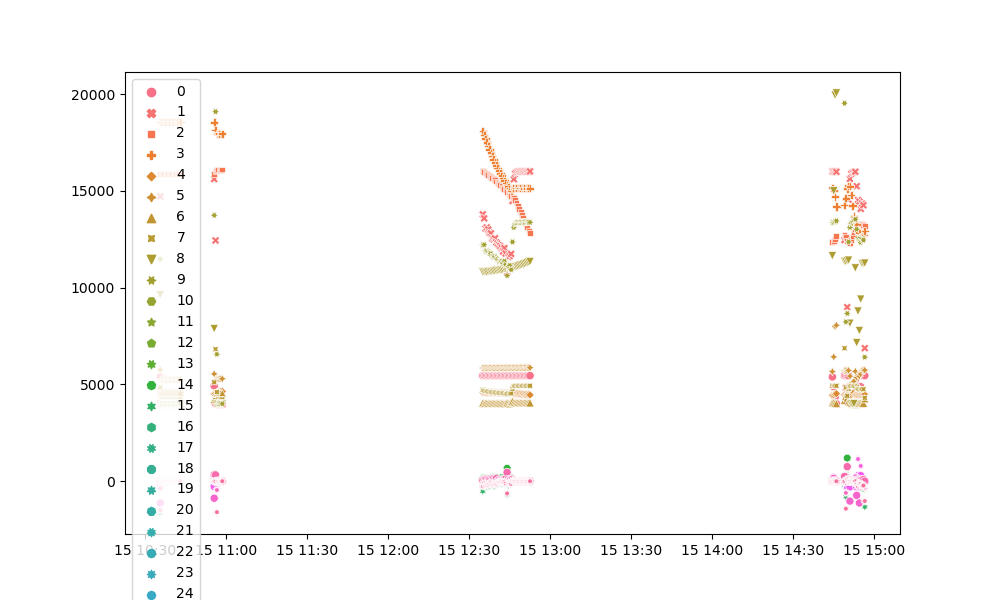

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new[(df_new.iloc[:, 40] != 'normal') & (df_new.iloc[:, 40] != 'restoring')])

plt.show()

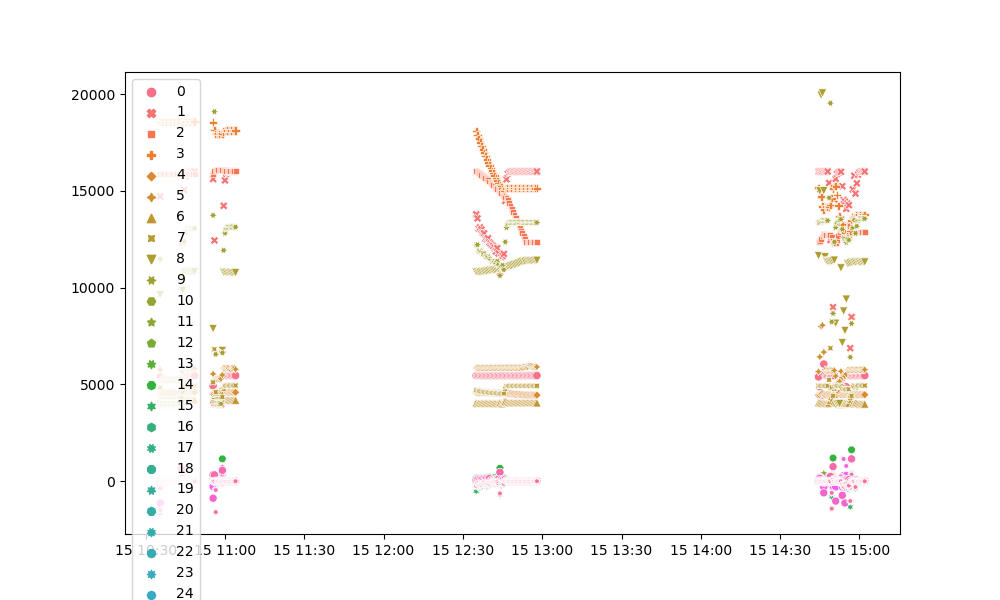

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new[(df_new.iloc[:, 40] != 'normal')])
plt.show()

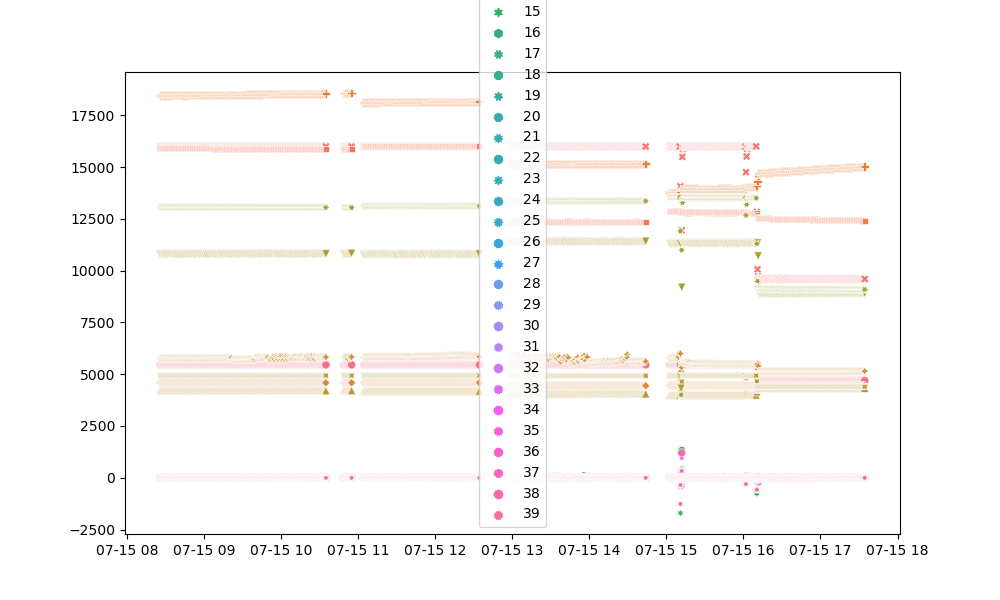

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new[(df_new.iloc[:, 40] == 'normal')])
plt.show()

NameError: name 'processed_df' is not defined

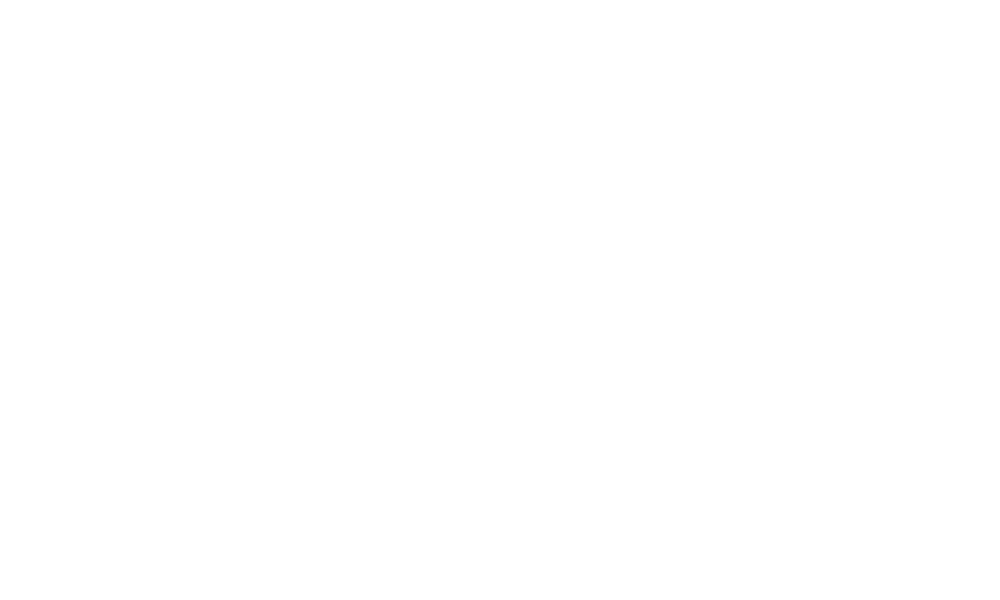

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=processed_df[processed_df[40]!='normal'])
plt.show()

## Correlation between anomalies and sensor data 

In [ ]:
def anomalie_detection(begin, end, event_name, df):
    event_begin = pd.to_datetime('2022-07-15 ' + begin)
    event_end = pd.to_datetime('2022-07-15 ' + end)
    pre_time = event_begin - timedelta(minutes=2)
    aft_time = event_end + timedelta(minutes=3)

    sub_df = df[pre_time : aft_time]
    fig, ax = plt.subplots(figsize=(18,8))
    ax.plot(sub_df,'o-', label=df.columns)
    ax.vlines([event_begin, event_end], df.min().min(), df.max().max(), colors='black', linestyles='dashed' )
    #ax.set_yscale('log')
    ax.legend()
    ax.set_title(f'{event_name}, begin: {begin}, end: {end}', fontsize=14)
    plt.show()

In [ ]:
event_dic = {
    'power_on_off': ['10:35:00', '10:44:00'],
    'instrument_air_close_open': ['10:54:00', '10:59:00'],
    'HV_201_open_close': ['12:35:00', '12:45:00'],
    'HV_101_open_close': ['12:46:00', '12:53:00'],
    'LCV_203_air_close_open': ['14:43:00', '14:46:00'],
    'LCV_103_air_close_open': ['14:48:00', '14:50:00'],
    'SV_101_air_close_open': ['14:50:00', '14:53:00'],
    'SV_101_air_half_close_open': ['14:53:00', '14:55:00'],
    'SV_201_air_close_open': ['14:55:00', '14:57:00'],
    'P2_7gpm_P1_6.5gpm': ['16:11:00', '16:11:00']
}

## visualoize the processed df